# MyAnimeList User Scores -- Machine Learning Techniques for Prediction and Exploratory Data Analysis
### Amanda Foster

## Introduction

<img style="float: right; width: 400px;" src="https://interviewerpr.com/wp-content/uploads/2023/03/anime.jpeg">

### What is anime?

Anime (アニメ) refers to a style of animated works originating from Japan, including television series, films, and web series. Anime covers a variety of genres and themes, making it appealing to all ages, interests, and backgrounds. Popular titles from the last twenty years of anime production include Demon Slayer, Naruto, and Attack on Titan, and more classic titles include Pokemon and Dragon Ball. With origins in the early 20th century, techniques for producing anime have developed from simple, hand-drawn animations to mixtures of computer-generated, digital, and hand-drawn elements. As these techniques mature and the market for animation worldwide continues to grow, production costs for new anime also grow. Despite the rising costs, dozens of new titles are released season-by-season by a variety of animation studios hoping to capture existing and new audiences. Developing a model for when to release, what genres and themes to include, and what studio styles audiences are rating well may help studios determine what factors are most marketable.

While it seems like a small industry to a western audience, the Association of Japanese Animation reports that the 2022 year-on-year [total revenue reached 20.63 billion USD](https://erzat.blog/anime-industry-report-2022-part-1-the-japanese-anime-industry-is-now-worth-nearly-3-trillion-yen-its-largest-ever-recorded-since-2002/), 9.88 billion USD of which comes from markets outside Japan. Suffice it to say, there's a lot of money to be made in the medium, particularly when we factor in the cost of production. Producer Yoshitada Fukuhara reports that the average cost of an episode of anime [is a mere $142,000 USD](https://otakuusamagazine.com/anime-budgets-have-increased-thanks-to-global-demand-says-producer/), which pales in comparison to the average cost of an episode of a [Netflix original show at over $5 million](https://variety.com/2017/tv/news/tv-series-budgets-costs-rising-peak-tv-1202570158/). 

[MyAnimeList (MAL)](https://myanimelist.net/) is a popular site for anime fans to rate, review, and find recommendations for new anime. MAL is an excellent source that collects all of the relevant features of an anime, as well as rankings tables for popularity and user score. You can access one of those tables (here). It is also the source for the dataset we will be using for this tutorial. 

(Image source: InterviewerPR)

### Tutorial 

The data science pipeline is a five-step process for using data to gain insight into a data set, answer questions about that data, and make predictions. We will traverse the entire pipeline during the course of this tutorial using the MAL dataset. The steps of the pipeline are as follows:

1. Data collection 
2. Data cleaning
3. Exploratory Data Analysis (EDA)
4. Machine Learning (ML) Techniques and Hypothesis Testing
5. Insight

Our primary question of interest is whether we can predict score based on any one feature or collection of features. We'll investigate this in EDA, then try to build a model that can effectively predict score.


## Getting Started and Data Collecting

### Data Source

We will be sourcing the anime feature data from Kaggle, available [here.](https://www.kaggle.com/datasets/andreuvallhernndez/myanimelist)

This data was scraped from MAL, and it contains 24,165 rows each with 39 attributes.

Once the dataset is downloaded, place it into the same directory as your analysis code.

### Installing Libraries

We will be using the basic python libraries pandas, numpy, matplotlib, seaborn, scikit-learn and ast. For more compact code, we can rename the libraries to shorter aliases. We'll import some of these now and the ML libraries for later, since we only need a few functions.

If you haven't installed these yet, ensure these are installed using the terminal commands below: 

* pandas -- # pip install pandas #
* numpy -- # pip install numpy #
* matplotlib -- # pip install matplotlib #
* seaborn -- # pip install seaborn #
* scikit-learn -- # pip install scikit-learn #
* ast -- # pip install ast #

In [458]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb
import ast

## Data Processing

The dataset is already in CSV format, so it can immediately be read in using the pandas library read_csv function. This leaves us with a very large dataframe -- over 24000 rows and 39 columns. We will definitely be cleaning this up.

In [459]:
df = pd.read_csv('anime.csv')
df.head()

,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.10,2037075,finished_airing,64.0,2009-04-05,2010-07-04,manga,...,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",After a horrific alchemy experiment goes wrong...,NaN,https://cdn.myanimelist.net/images/anime/1208/...,https://myanimelist.net/anime/5114/Fullmetal_A...,https://www.youtube.com/watch?v=--IcmZkvL0Q,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...
1,11061,Hunter x Hunter (2011),tv,9.04,1671587,finished_airing,148.0,2011-10-02,2014-09-24,manga,...,"['VAP', 'Nippon Television Network', 'Shueisha']",['VIZ Media'],Hunters devote themselves to accomplishing haz...,NaN,https://cdn.myanimelist.net/images/anime/1337/...,https://myanimelist.net/anime/11061/Hunter_x_H...,https://www.youtube.com/watch?v=D9iTQRB4XRk,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)']
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.05,1491491,finished_airing,10.0,2019-04-29,2019-07-01,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin adapts content from volumes...,https://cdn.myanimelist.net/images/anime/1517/...,https://myanimelist.net/anime/38524/Shingeki_n...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,[]
3,9253,Steins;Gate,tv,9.07,1348232,finished_airing,24.0,2011-04-06,2011-09-14,visual_novel,...,"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],Eccentric scientist Rintarou Okabe has a never...,Steins;Gate is based on 5pb. and Nitroplus' vi...,https://cdn.myanimelist.net/images/anime/1935/...,https://myanimelist.net/anime/9253/Steins_Gate,https://www.youtube.com/watch?v=27OZc-ku6is,Steins;Gate,STEINS;GATE,[]
4,28851,Koe no Katachi,movie,8.94,1540277,finished_airing,1.0,2016-09-17,2016-09-17,manga,...,"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A...","['Eleven Arts', 'NYAV Post']","As a wild youth, elementary school student Sho...",Koe no Katachi won the following awards: Japan...,https://cdn.myanimelist.net/images/anime/1122/...,https://myanimelist.net/anime/28851/Koe_no_Kat...,https://www.youtube.com/watch?v=XBNWo25izJ8,A Silent Voice,聲の形,['The Shape of Voice']


We don't need about half of these columns for our analysis, so we can drop those. We'll also drop the adult-rated titles. The result is a 23441x20 dataframe.

In [460]:
df = df[df['sfw'] == True]
df.drop(columns=['anime_id', 'episode_duration', 'real_start_date', 'sfw', 'members', 'real_end_date', \
                 'total_duration', 'approved', 'created_at', 'licensors', 'updated_at', 'synopsis', \
                 'background', 'main_picture', 'url', 'producers', 'trailer_url', 'title_english', \
                 'title_japanese', 'title_synonyms'], \
                 inplace=True)

Next, it may be helpful to have the broadcast time for later analysis, but categories may be more helpful than continuous time. It seems more likely for a show to start at 10:00 on the dot rather than 10:05, but we don't want to capture that degree of specificity. We would say both shows aired mid-morning. 

Let's establish the ranges in 3-hour increments as such: 

* 0:01 to 3:00 is late_night
* 3:01 to 6:00 is late_late_night
* 6:01 to 9:00 is early_morning
* 9:01 to 12:00 is mid_morning
* 12:01 to 15:00 is afternoon
* 15:01 to 18:00 is late_afternoon
* 18:00 to 21:00 is mid_evening
* 21:00 to 0:00 is prime_time

In [461]:
# create temporary column
temp = pd.to_datetime(df['broadcast_time'], format='%H:%M:%S')
# set up bins and labels for separation
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
labels = ['late_night', 'late_late_night', 'early_morning', 'mid_morning', 'afternoon', 'late_afternoon', 'mid_evening', 'prime_time']

# use pandas cut function to cut the broadcast times into bins based on the bins series
df['broadcast_time'] = pd.cut(temp.dt.hour, bins, labels=labels, right=False)

df.head()

,title,type,score,scored_by,status,episodes,start_date,end_date,source,favorites,rating,start_year,start_season,broadcast_day,broadcast_time,genres,themes,demographics,studios
0,Fullmetal Alchemist: Brotherhood,tv,9.10,2037075,finished_airing,64.0,2009-04-05,2010-07-04,manga,219036,r,2009.0,spring,sunday,late_afternoon,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],['Shounen'],['Bones']
1,Hunter x Hunter (2011),tv,9.04,1671587,finished_airing,148.0,2011-10-02,2014-09-24,manga,202109,pg_13,2011.0,fall,sunday,mid_morning,"['Action', 'Adventure', 'Fantasy']",[],['Shounen'],['Madhouse']
2,Shingeki no Kyojin Season 3 Part 2,tv,9.05,1491491,finished_airing,10.0,2019-04-29,2019-07-01,manga,55644,r,2019.0,spring,monday,late_night,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",['Shounen'],['Wit Studio']
3,Steins;Gate,tv,9.07,1348232,finished_airing,24.0,2011-04-06,2011-09-14,visual_novel,184312,pg_13,2011.0,spring,wednesday,late_night,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",[],['White Fox']
4,Koe no Katachi,movie,8.94,1540277,finished_airing,1.0,2016-09-17,2016-09-17,manga,84124,pg_13,2016.0,summer,NaN,NaN,"['Award Winning', 'Drama']",['Romantic Subtext'],['Shounen'],['Kyoto Animation']


Now we perform some final quality of life functions to make the data easier to process later. First, convert the start_year and episode columns to integers. Then, convert the start_date and end_date columns to datetime objects. This is for easier comparison later.

In [462]:
# converting float years and episodes to ints
df['score'] = df['score'].map(lambda x: float(x))
df['start_year'] = df['start_year'].fillna(0).astype(int)
df['start_year'] = df['start_year'].replace(0, np.nan)
df['episodes'] = df['episodes'].fillna(0).astype(int)
df['episodes'] = df['episodes'].replace(0, np.nan)

# changing to datetime
df['start_date'] = pd.to_datetime(df['start_date'], format='%Y-%m-%d')
df['end_date'] = pd.to_datetime(df['end_date'], format='%Y-%m-%d')

A few of the columns are, unfortunately, literal strings that should be represented as lists. We can fix this by using the Abstract Syntax Tree library. The library takes a string, determines what its intended structure is, and represents it as such. With this, we can iterate through the lists as needed.

In [463]:
for col in ['genres', 'themes', 'studios', 'demographics']:
    df[col] = df[col].apply(ast.literal_eval)

Then, narrow down the demographics column to just one demographic. Demographics refer to the [audience that the source material was intended to market to](https://thenanimelist.wordpress.com/2021/06/29/4-types-of-anime-demographics/). The most common genres include: Shounen (少年), intended for boys up until adulthood, Shoujo (少女), intended for girls up until adulthood, and Seinen (青年), intended for adults, in that order. We'll assume that if Shounen is found in the demographics list, then it is the dominant one. After that, shoujo, and after that, seinen. After this processing, if any anime remain with two demographics or more, simply choose the first demographic. 

In [464]:
labels = ['Shounen', 'Shoujo', 'Seinen', 'Kids', 'Josei']

for i in labels: 
    df['demographics'] = df['demographics'].apply(lambda x: i if i in x else 'None' if x == [] else x)

df['demographics'].replace('None', np.nan)

0        Shounen
1        Shounen
2        Shounen
3            NaN
4        Shounen
          ...   
24980        NaN
24981       Kids
24982        NaN
24983       Kids
24984        NaN
Name: demographics, Length: 23441, dtype: object

For the purposes of this analysis, we're going to focus on television series that have aired or are currently airing only. So we will be dropping movies and OVAs, as well as series that are not yet airing.

In [465]:
# use groupby type and then only grab observations that are in the 'tv' group
df = df.groupby('type').get_group('tv')

# group by finished airing and currently airing then concatenate
df1 = df.groupby('status').get_group('finished_airing')
df2 = df.groupby('status').get_group('currently_airing')
df = pd.concat([df1, df2], axis=0)

# resort by score
df = df.sort_values(by='score', ascending=False)

Now we have a finished dataset ready for handling (for now)!

In [466]:
df.head()

,title,type,score,scored_by,status,episodes,start_date,end_date,source,favorites,rating,start_year,start_season,broadcast_day,broadcast_time,genres,themes,demographics,studios
0,Fullmetal Alchemist: Brotherhood,tv,9.10,2037075,finished_airing,64.0,2009-04-05,2010-07-04,manga,219036,r,2009.0,spring,sunday,late_afternoon,"[Action, Adventure, Drama, Fantasy]",[Military],Shounen,[Bones]
3,Steins;Gate,tv,9.07,1348232,finished_airing,24.0,2011-04-06,2011-09-14,visual_novel,184312,pg_13,2011.0,spring,wednesday,late_night,"[Drama, Sci-Fi, Suspense]","[Psychological, Time Travel]",None,[White Fox]
103,Gintama°,tv,9.06,240466,finished_airing,51.0,2015-04-08,2016-03-30,manga,16132,pg_13,2015.0,spring,wednesday,mid_evening,"[Action, Comedy, Sci-Fi]","[Gag Humor, Historical, Parody, Samurai]",Shounen,[Bandai Namco Pictures]
114,Bleach: Sennen Kessen-hen,tv,9.06,228906,finished_airing,13.0,2022-10-11,2022-12-27,manga,18798,r,2022.0,fall,tuesday,late_night,"[Action, Adventure, Fantasy]",[],Shounen,[Pierrot]
2,Shingeki no Kyojin Season 3 Part 2,tv,9.05,1491491,finished_airing,10.0,2019-04-29,2019-07-01,manga,55644,r,2019.0,spring,monday,late_night,"[Action, Drama]","[Gore, Military, Survival]",Shounen,[Wit Studio]


# Exploratory Data Analysis

### Basic Descriptive Statistics

The first thing we can do is describe the data. This gives us a breakdown of various summary statistics for each column that contains numeric data. 

In [467]:
df.describe()

,score,scored_by,episodes,start_date,end_date,favorites,start_year
count,4556.000000,7.422000e+03,7352.000000,7003,5724,7422.000000,5456.000000
mean,6.866791,4.917675e+04,39.649891,2009-02-03 05:16:39.857204224,2008-10-13 21:06:09.811320576,1286.340878,2007.935484
min,2.900000,1.000000e+00,1.000000,1961-05-01 00:00:00,1962-02-25 00:00:00,0.000000,1961.000000
25%,6.350000,1.400000e+01,12.000000,2005-01-01 00:00:00,2003-12-05 06:00:00,0.000000,2003.000000
50%,6.870000,8.140000e+02,26.000000,2012-01-08 00:00:00,2012-03-30 00:00:00,5.000000,2012.000000
75%,7.390000,2.243400e+04,50.000000,2017-04-13 12:00:00,2017-12-09 18:00:00,197.000000,2017.000000
max,9.100000,2.685033e+06,3057.000000,2023-08-07 00:00:00,2023-08-11 00:00:00,219036.000000,2023.000000
std,0.801199,1.611600e+05,80.907419,NaN,NaN,7784.304068,12.919927


From this table, we can make the following conclusions: 

* The mean and median are at a score of 6.87. 
* 75% of shows are above a score of 7.4.
* The mean number of episodes in a series is 39 while the median is 26. 
* There seems to be a lot of variance in the number of episodes - standard deviation is 80.
* 75% of series have 193 favorites or fewer, and there is a lot of variation in the number of favorites.
* The max number of episodes is 3000. That's obviously an outlier that we will have to deal with.

Let's take a look at distribution for both number of episodes and scores. We will do this with the seaborn histplot function. We can put the 2 subplots together in a row using matplotlib's ncol parameter. This saves us some vertical space. 

<Axes: xlabel='score', ylabel='Count'>

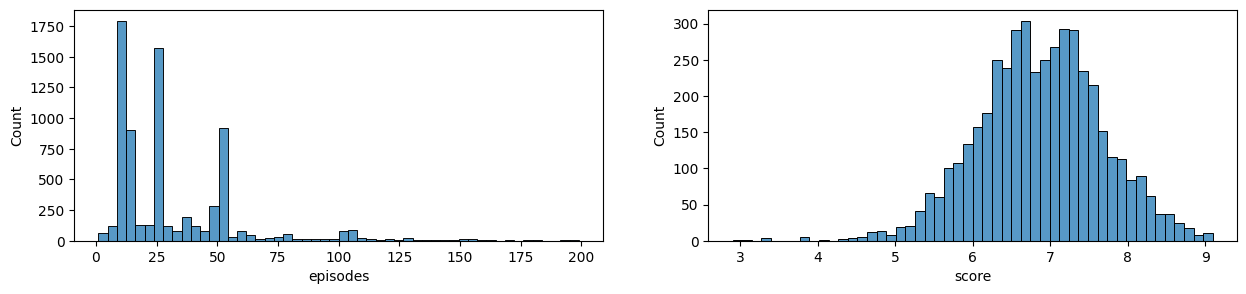

In [468]:
# ax1 and ax2 will name the subplots, the number is determined by ncols
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,3))

# determining how many episodes is typical. anything over 200 is an outlier.
(df['episodes'] > 200).sum()/df['episodes'].sum()   ## 0.45%
ep = df[df['episodes'] < 200]

# plotting using the ax1 and ax2 we set before
sb.histplot(ep, x='episodes', ax=ax1)
sb.histplot(df, x='score', ax=ax2)

For episodes, we can see spikes at 12, 13, 25, and 52 episodes. Traditionally, these are the number of episodes a network expects to see from one or two seasons of an anime series. The most common is 12 episodes, which corresponds to one season in the modern era and half a season in the past.

Let's look at the distribution of different demographics, start season, rating, and airing status as well. 

<Axes: xlabel='status', ylabel='Count'>

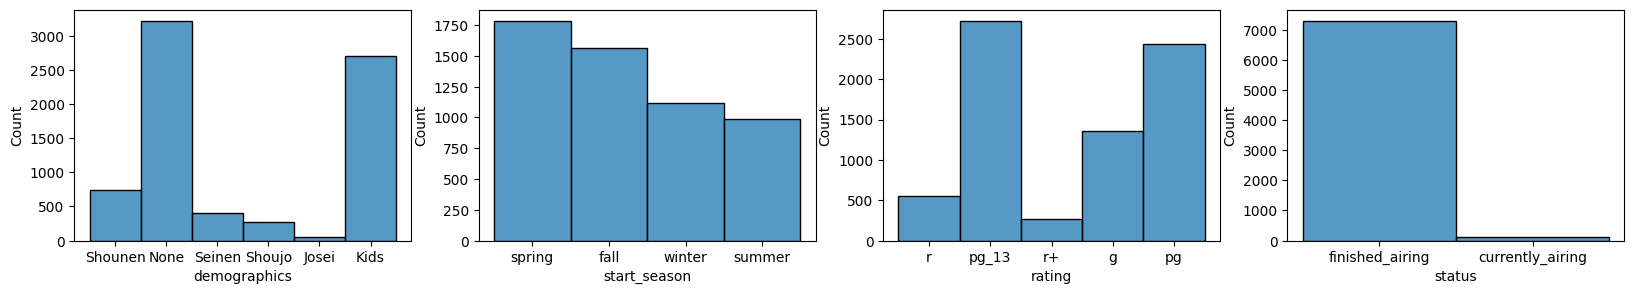

In [469]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,3))
sb.histplot(df, x='demographics', ax=ax1)
sb.histplot(df, x='start_season', ax=ax2)
sb.histplot(df, x='rating', ax=ax3)
sb.histplot(df, x='status', ax=ax4)

The most common demographic is undefined, followed by kids. The most common rating is PG-13, followed by PG. And the vast majority of shows have finished airing.

Looking at plots for more features. (Source, broadcast day, broadcast time, and the top 20 studios). The first plot will be in its own matplotlib plot, but we'll show the nrows functionality of matplotlib on the second two. By specifying 'nrows=2', we can put two plots right below one another. It works similarly to the ncols parameter -- specify the number of plots with nrows and name that many as a tuple for later reference.

<Axes: xlabel='broadcast_time', ylabel='count'>

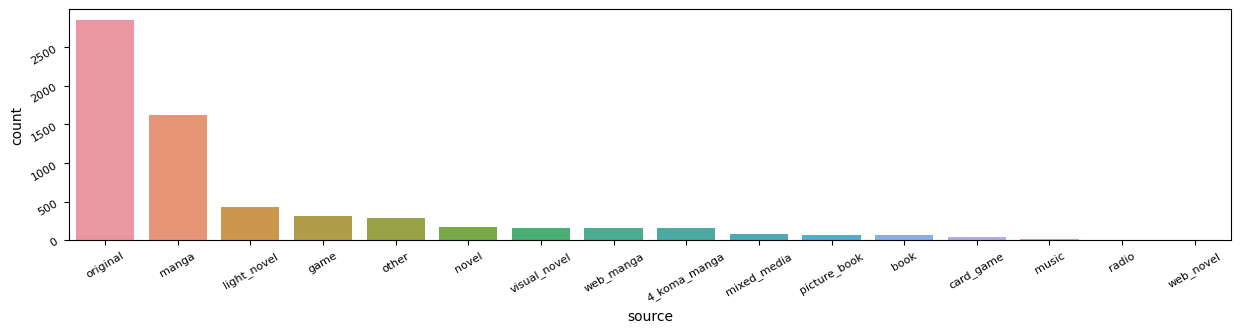

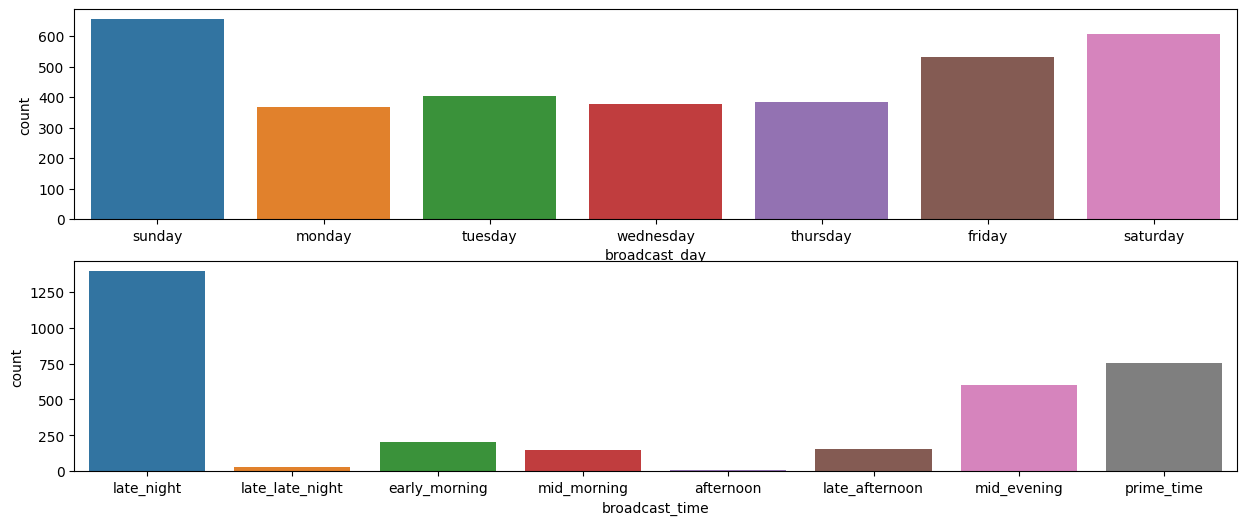

In [470]:
# first plot
fig, ax1 = plt.subplots(figsize=(15,3))
# do a countplot because it's prettier than a histplot. set order in plot by most anime per source down to least anime per source
sb.countplot(df, x='source', ax=ax1, order = df['source'].value_counts().index)
# rotate and change fontsize of ticks so we can actually read them
ax1.tick_params(labelsize=8, rotation=30)

# second plot. we'll fit two in here one on top of the other
fig, (ax2, ax3) = plt.subplots(nrows=2, figsize=(15,6))
# do a countplot and set order by weekday, starting at sunday
sb.countplot(df, x='broadcast_day', ax=ax2, order = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday'])
# do another countplot by broadcast time. order doesn't matter here.
sb.countplot(df, x='broadcast_time', ax=ax3)

The most common source is anime original, followed by manga and light novel. 

Sunday and Saturday are the most common air dates. 

Late night (midnight to 3am) is the most common air time, followed by prime time (21:00 to midnight). 

Toei Animation has produced the most shows, followed by Sunrise and JC Staff.

### Investigating Relationships between Score and Different Features
#### Continuous Data

With the basic counts and histograms out of the way, let's see if we can generate any insight into what is a good predictor of score on MAL. As a reminder, score is a user-generated rating of quality of the show based on subjective factors. Scores are from 1 to 10. From the descriptive statisitics, we saw that the lowest score was 2.9 and the highest score was 9.1. 

First, let's generate a heatmap to see if there are correlations and interactions between any two features. We can do this with the seaborn heatmap function. Only the continuous data will be reflected here (score, score_by, episodes, start_date, end_date, favorites, and start_year). We'll have to do the categorical data later.

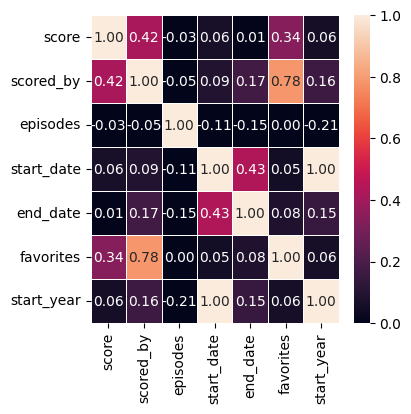

In [471]:
# narrow down to just the features we can do linear regression with
df2 = df[['score', 'scored_by', 'episodes', 'start_date', 'end_date', 'favorites', 'start_year']]

# plot 1
fig, ax = plt.subplots(figsize=(4,4))
# set up correlation
corr = df2.corr() 
# use seaborn heatmap with correlation matrix we generated above
heatmap = sb.heatmap(corr, ax=ax, annot=True, fmt=".2f", linewidths=.5, vmin=0, vmax=1)

From this heatmap, we can generate the following insights:

* The only strong correlation we see is between number of scores (scored_by) and favorites. As score goes up, favorites go up. This makes sense -- if a show is highly rated, more people will add it to their favorites list.

* There is a medium correlation between score and number of scores (scored_by). As scores go up, the number of scores goes up. This makes sense, as users may look at the sitewide rankings for ideas for what to watch.

* There is a weaker correlation between score and favorites. As score goes up, favorites also go up.

It's not looking good for any of the interesting continuous variables. There's not much correlation between any one feature and score, which is our main topic of interest.

Let's visualize the (lack of) correlation between start year and score using seaborn's regplot. Regplot generates both a scatterplot and a regression line at the same time.

Correlation: 0.05759647338036529


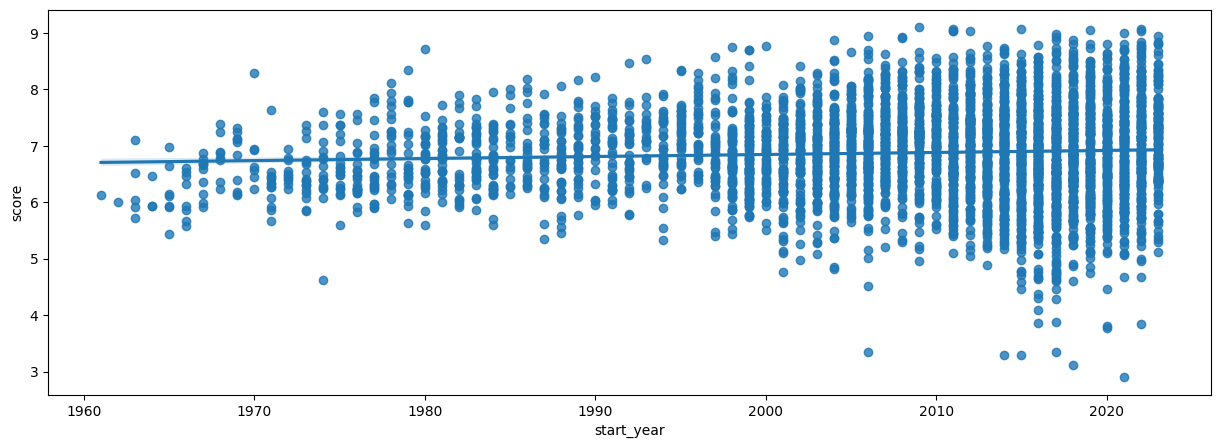

In [472]:
yrgb = df[['start_year', 'score']]

fig, ax = plt.subplots(figsize=(15,5))
sb.regplot(data=yrgb, x="start_year", y="score")

# corr produces a 2x2 matrix with structure [[1, corr] [corr, 1]]
print("Correlation: " + str(yrgb.corr().iloc[0,1])) 

The regression line is almost flat -- no consistent variation whatsoever. The value from corr matches the 0.06 correlation coefficient from the heatmap. 

Let's see try to see if there's a relationship if we separate by season. Anime is produced on a season-by-season basis (Spring, Summer, Fall, Winter), with new shows dropping every season. 

First, we'll groupby start_season, then generate four different lines on the same plot grouped by season. We do this with the seaborn lineplot function and matplotlib's subplot function. Subplots allow you to generate multiple plots on the same axes, or multiple plots in a row.

<Axes: xlabel='start_year', ylabel='score'>

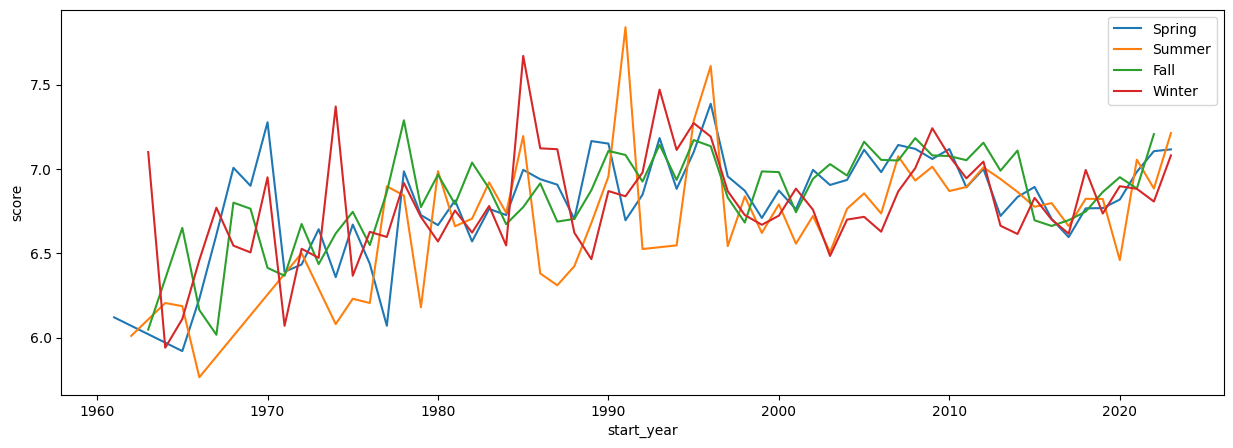

In [473]:
# groupby season
yrgb = df[['start_year', 'score', 'start_season']]
yrgb = yrgb.groupby(['start_season'])

# plot each season on one plot, with four different lines based on the grouping
fig, ax = plt.subplots(figsize=(15,5))
sb.lineplot(data=yrgb.get_group('spring'), x='start_year', y='score', errorbar=None, label='Spring')
sb.lineplot(data=yrgb.get_group('summer'), x='start_year', y='score', errorbar=None, label='Summer')
sb.lineplot(data=yrgb.get_group('fall'), x='start_year', y='score', errorbar=None, label='Fall')
sb.lineplot(data=yrgb.get_group('winter'), x='start_year', y='score', errorbar=None, label='Winter')

Still not much to go on. There's lot of year-to-year variation in each season with a bit of a wave pattern, but it all evens out in the end. There's an interesting degree of convergence starting in 2000. Across seasons, the score remains around 7.0. There does not seem to be a relationship between year and score even considering variation over seasons.

#### Categorical Data

So we're not seeing much correlation here for continuous data. Let's try to find some relationships between the more categorical data.

We will produce four violin plots, each showing the distribution of scores for each category in a given feature. A violin plot shows the distribution of scores across categories. We expect to see a normal distribution for each category. The four plots will be as follows:

* score by studio
* score by source
* score by demographic
* score by rating

<Axes: xlabel='rating', ylabel='score'>

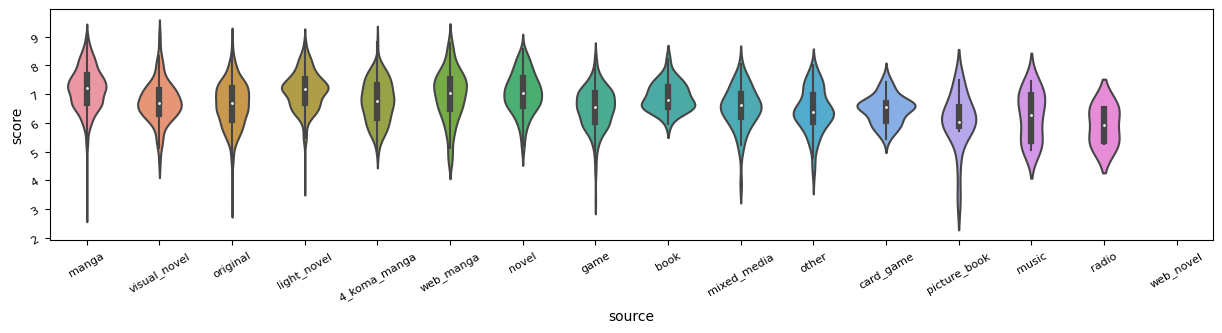

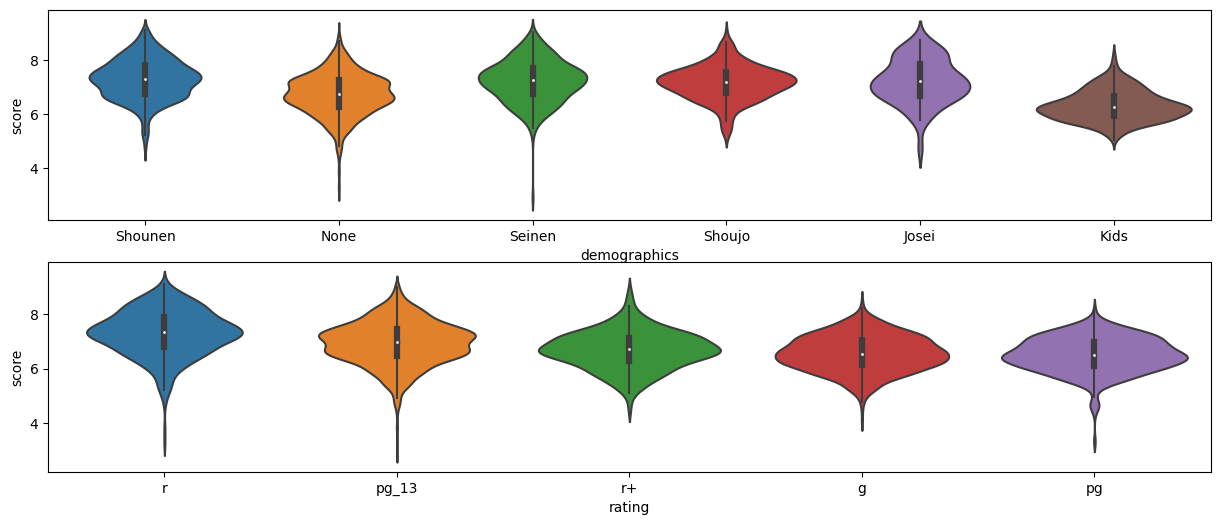

In [474]:
# source by score plot
sdf1 = df[['source', 'score']]
# demographic by score plot
sdf2 = df[['demographics', 'score']]
# rating by score plot
rdf = df[['rating', 'score']]

# set up plots
fig, ax1 = plt.subplots(figsize=(15,3))
sb.violinplot(data=sdf1, x='source', y='score', ax=ax1)
ax1.tick_params(labelsize=8, rotation=30)

fig, (ax2, ax3) = plt.subplots(nrows=2, figsize=(15,6))
sb.violinplot(data=sdf2, x='demographics', y='score', ax=ax2)
sb.violinplot(data=rdf, x='rating', y='score', ax=ax3)


Overall, the rating plot and demographic plot are normally distributed, with some skew towards the higher scores and a long tail into low scores for the R rating. There is not much difference in mean across categories. For all categories, the mean remains around 7.

The source plot is less normally distributed with some long tails stretching up to high scores and low scores. There is not much difference in mean across categories, like the other two plots.

### One-Hot Encoding

Now that the simple analysis is out of the way, let's pivot to the more complex columns -- genres and themes. These are more complex because they contain multiple elements. 

Let's start with some One Hot Encoding. One Hot Encoding transforms multicategorical data into vectors. Each row will now have an associated one hot encoding that tells us what themes the observation has and what genres the observation has. 

We'll save these one hot encoding for later.

In [475]:
def one_hot_encode(target):

    # create category list of all categories in the target
    catlist = []
    # find all unique categories and append into a list
    [catlist.append(i) if i not in catlist else catlist for c in target for i in c]

    # create one hot encoding for each observation 
    one_hot = []
    for c in target: 
        # create new list
        one_hot.append([])
        # access new list
        temp = one_hot[-1]
        # list comprehension to append 1 if we find the cat in the observation list
        # 0 if not
        [temp.append(1) if i in c else temp.append(0) for i in catlist]

    # convert to dataframe for visualization
    one_hotdf = pd.DataFrame(one_hot)
    # use catlist to make columns
    one_hotdf.columns = catlist

    return one_hotdf

# save studio, theme and genre one-hot-encodings for later
studio_ohe = one_hot_encode(df['studios'])
theme_ohe = one_hot_encode(df['themes'])
genre_ohe = one_hot_encode(df['genres'])

# example
genre_ohe.head()


,Action,Adventure,Drama,Fantasy,Sci-Fi,Suspense,Comedy,Romance,Supernatural,Award Winning,Mystery,Sports,Slice of Life,Ecchi,Horror,Avant Garde,Boys Love,Gourmet,Girls Love
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Before we move onto the Machine Learning portion, let's do one last visualization with the genre, theme, and source data we collected. 

We'll sum the one hot encoding dataframes by count and visualize genre, theme, and source data in three separate graphs to see if we see anything interesting.

[Text(0.5, 0, 'studios')]

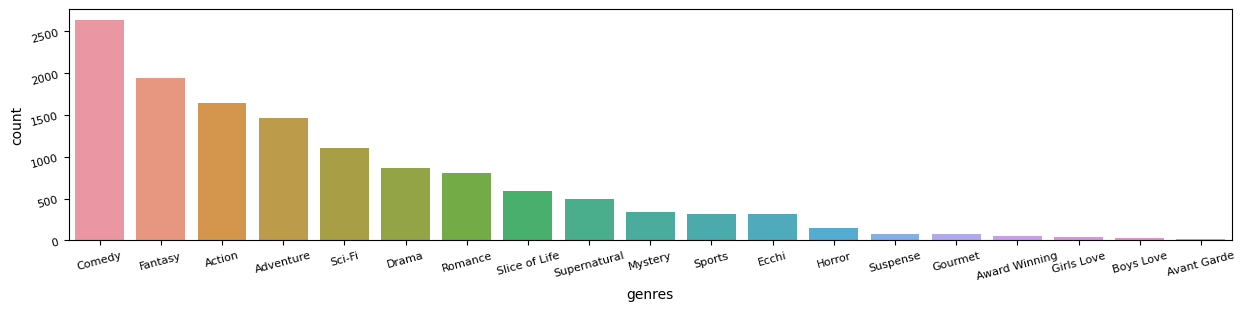

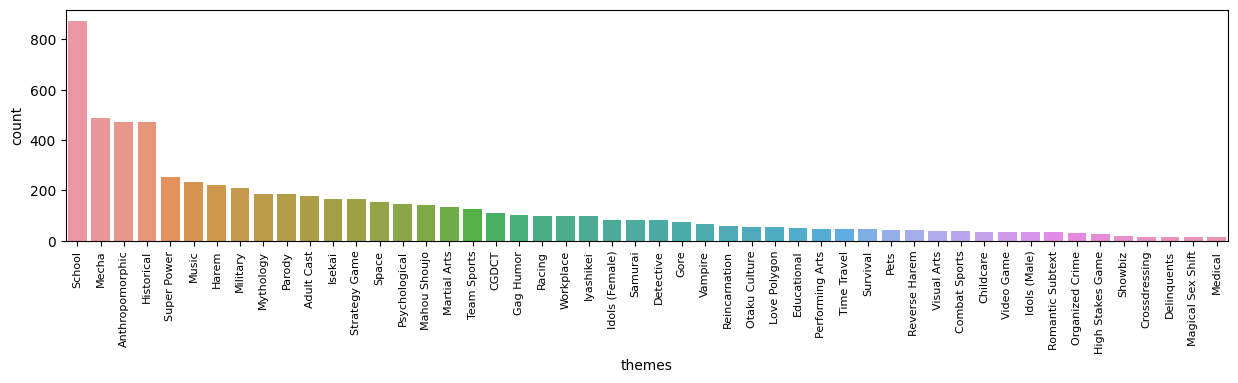

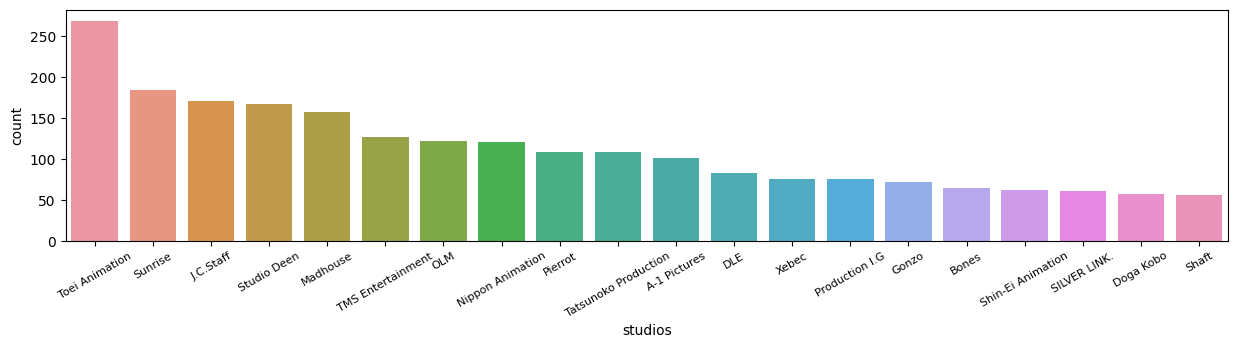

In [476]:
# create genre and theme dataframe counts. we can do this with our one-hot-encoding
gdf = pd.DataFrame(genre_ohe.sum(), columns=['count']).sort_values(by='count', ascending=False)
gdf['genres'] = gdf.index
tdf = pd.DataFrame(theme_ohe.sum(), columns=['count']).sort_values(by='count', ascending=False)
tdf['themes'] = tdf.index
sdf = pd.DataFrame(studio_ohe.sum(), columns=['count']).sort_values(by='count', ascending=False)
sdf['studios'] = sdf.index

# set up plots
fig, ax1 = plt.subplots(figsize=(15,3))
sb.barplot(data=gdf, x='genres', y='count', ax=ax1)
ax1.tick_params(labelsize=8, rotation=15)
ax1.set(xlabel='genres')

fig, ax2 = plt.subplots(figsize=(15,3))
sb.barplot(data=tdf, x='themes', y='count', ax=ax2)
ax2.tick_params(labelsize=8, axis='x', rotation=90)
ax2.set(xlabel='themes')

fig, ax3 = plt.subplots(figsize=(15,3))
sb.barplot(data=sdf[0:20], x='studios', y='count', ax=ax3)
ax3.tick_params(labelsize=8, axis='x', rotation=30)
ax3.set(xlabel='studios')

In all three graphs, there's a clear winner. Comedy is the most popular genre, school is the most popular theme, and TOEI Animation is the most prolific studio. This matches my own subjective experience from watching anime, so there's no suprises here. 

### Is there really too much Isekai?

One last thing we can do is try to confirm or reject the idea that the Isekai theme has been increasing over time. Isekai (異世界) refers to stories with the central theme or conflict being related to being reincarnated into another world. Examples of shows with this theme include Konosuba, Sword Art Online, Re:Zero, and Mushoku Tensei. 

Many fans believe that isekai has taken over the medium, with most of the shows produced every season having this theme. Let's see if we can confirm that.

Correlation: 0.8105481876150202


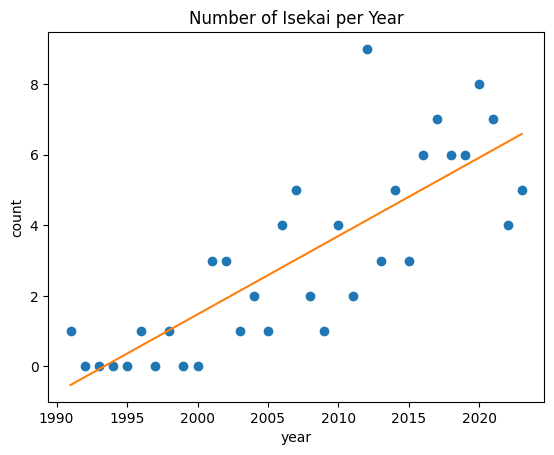

In [477]:
# restrict to more modern anime
recent = df[df['start_year'] > 1990]
# join from one-hot-encoding theme dataframe
recent = recent[['title', 'start_year','score']].join(theme_ohe[['Isekai', 'Reincarnation', 'Video Game']])

# filter based on score of 1 in isekai and reincarnation respectively
isekai = recent[recent['Isekai'] == 1]
reincar = recent[recent['Reincarnation'] == 1]

# outer merge isekai and reincarnation dataframes to include both
ise_over_time = isekai.merge(reincar, how='outer', on=['title', 'start_year', 'score'])
# find number of isekai per year
ise_over_time = ise_over_time[['start_year', 'score']].groupby(by='start_year').count().reset_index()

# add missing years with 0 counts
missing = pd.DataFrame([[1992.0, 0], [1993.0, 0], [1994.0, 0], [1995.0, 0], [1997.0, 0], [1999.0, 0], [2000.0, 0]], 
                       columns=['start_year', 'score'])
ise_over_time = pd.concat([missing, ise_over_time]).sort_values(by='start_year').reset_index()

# plot with regression line
x,y = ise_over_time['start_year'], ise_over_time['score']
ax1 = plt.plot(x, y, 'o')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.xlabel('year')
plt.ylabel('count')
plt.title('Number of Isekai per Year')

# corrcoef produces a 2x2 matrix with structure [[1, corr] [corr, 1]]
print("Correlation: " + str(np.corrcoef(x,y)[0,1])) 

We see an impressive correlation between the number of isekai and the year. In the 90s, there are very few shows described as such, with multiple years of no shows matching this description. However, in the mid-2000s, we begin to see an uptick in the number of shows described as isekai or reincarnation theme. 

But does this mean that isekai has taken over the medium? Hardly. The number of shows has gone up over time overall, as we can see below.

Text(0.5, 1.0, 'Total Shows per Year')

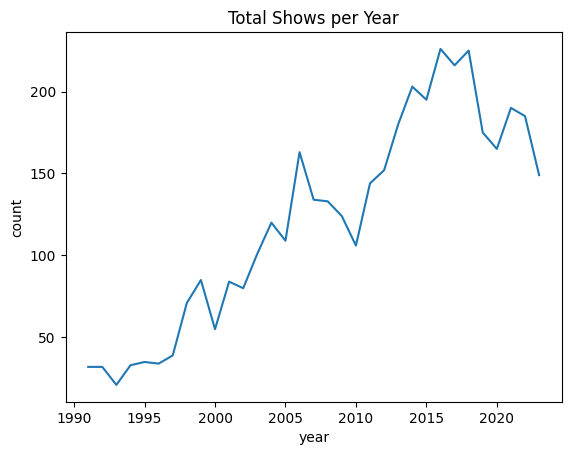

In [478]:
# find number of shows per year starting in 1991
rest = recent[['start_year', 'score']].groupby(by='start_year').count().reset_index()

# lineplot
x,y = rest['start_year'], rest['score'] 
plt.plot(x, y)
plt.xlabel('year')
plt.ylabel('count')
plt.title('Total Shows per Year')

So we have to find the percentage of shows that are isekai/reincarnation theme over the total of shows per year. Only then can we tell if that theme is actually dominating the medium. 

Correlation: 0.5498963470175493


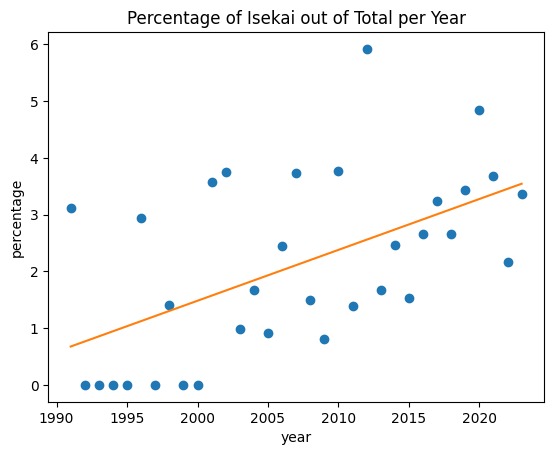

In [479]:
# find number of isekai per year starting in 1991
rest = recent[['start_year', 'score']].groupby(by='start_year').count().reset_index()

# plot with regression line
x,y = ise_over_time['start_year'], ise_over_time['score']/rest['score'] * 100
plt.plot(x, y, 'o')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.xlabel('year')
plt.ylabel('percentage')
plt.title('Percentage of Isekai out of Total per Year')

# corrcoef produces a 2x2 matrix with structure [[1, corr] [corr, 1]]
print("Correlation: " + str(np.corrcoef(x,y)[0,1])) 

Certainly the percentage is going up year over year, but the correlation is much weaker (0.54 compared to 0.81). Moreover, the percentages are extremely low -- isekai only accounted for 6% of shows even at the maximum in 2012. An alternative explanation for this seeming dominance in the medium could be confirmation bias. If we believe that isekai has dominance, we will pay more attention to the number of isekai shows released per season. It's also possible that many shows that should have been given the theme "isekai" did not in this dataset or on MAL. 


## Machine Learning -- Predicting Scores

### Setting Up

So we can't find any correlations between score and any one feature or feature pairing as we have it now. But perhaps we can work some machine learning magic to make a model that *can* predict score based on the features we give it. 

First, let's import the functions we'll be using for all three models.

In [480]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


Now that we have our imports, let's finish with the one-hot-encoding. We first drop all the observations with NaNs left over. They are likely the result of the web scraper missing information on the page, or they may be from anime with less information on its MAL page. Either way, the reason they are missing data is likely not related to score, so we can drop them. 

We still have to separate out start season, broadcast time, broadcast day, and source into vectors. We can do this a lot easier than before using just the pandas library and the get_dummies function. 

Then we join the previous one hot encodings with the ones we just made.

Finally, we drop all NaNs again. They will prevent the SVM from working.

In [481]:
# drop remaining NaNs because get_dummies hates them
df2 = df.dropna()

# use get_dummies to one-hot encode the remaining relevant columns
big_ohe = pd.get_dummies(df2[['start_season', 'broadcast_time', 'broadcast_day', 'source']], 
                        columns=['start_season', 'broadcast_time', 'broadcast_day', 'source'], dtype=int)

# join the one-hot-encodings we just made with the ones we made before
df2 = df2[['score', 'start_year', 'episodes', 'favorites']]
df2 = df2.join(big_ohe).join(theme_ohe).join(genre_ohe).join(studio_ohe)

# drop nans produced by joining
df2 = df2.dropna()
df2.head()

,score,start_year,episodes,favorites,start_season_fall,start_season_spring,start_season_summer,start_season_winter,broadcast_time_late_night,broadcast_time_late_late_night,...,Taikong Works,Oyster,Central Animation Studio,Imagestone Inc.,Fantawild Animation,Xing Xing Donghua,New Deer,Directions,NHK Art,Studio A. Craft
0,9.10,2009.0,64.0,219036,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.07,2011.0,24.0,184312,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,9.06,2015.0,51.0,16132,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,9.06,2022.0,13.0,18798,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.05,2019.0,10.0,55644,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we're ready for the data splitting.

First, let's copy the dataframe we just made so we can train other models.

Then we shuffle and split the data into training and validation data. We'll be using a 70-30 split here.

Next, set X as all of the columns of the training data minus score. The training data's score column will be your y value.
Do the same for the validation data.

In [482]:
# copy data
ml = df2.copy()

# shuffle data
ml = ml.sample(frac=1).reset_index()

# split into training and validation data (70% train, 30% validation)
train,val = train_test_split(ml, test_size=0.3)

# set X as all columns without score
X = train.drop(columns='score').to_numpy()
# set y as score column
y = train.score

# set validation up while we're at it
val_X = (val.drop(columns='score')).to_numpy()
val_y = val.score

With all of that out of the way, we can train our models. We're going to train an SVM, Linear Regression model, and Random Forest model.

### Model 1 -- Support Vector Machine

We're going to start with a Support Vector Machine (SVM). An SVM is a type of supervised learning model. SVMs are usually used for binary classification tasks in which the goal is to find a hyperplane that separates two classes of data. Support Vector Machines can also be used for regression analysis to ["approximate the relationship between input variables and a continuous target variable."](https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/) 

Let's set up our machine: 

* First, set up the SVM and fit it to the data. This is where the magic happens.
* Once we have the SVM, we can use it to predict from the validation data that we set up before. 
* To see how closely each validation observation prediction matches the actual score, we will print it out to the console. It looks like everything is matching pretty well, so let's hope our R2 and MSE values agree.
* Then, let's cross our fingers again and hope we yield a good R2 and MSE score.

In [488]:
from sklearn import svm

# set up and fitting
svmm = svm.SVR().fit(X,y)
# predict scores based on validation data
svm_pred = svmm.predict(val_X)

# actual scores
actual = list(val.score)

# comparison of actual scores and predicted scores
for i in range(10):
    print(f'Actual Score: {actual[i]:3f}              Predicted Score: {svm_pred[i]:3f}             Difference: {actual[i] - svm_pred[i]:3f}')

# overall stats
print("\nSTATISTICS:")
print("R2: " + str(r2_score(actual, svm_pred)))
print("MSE: " + str(mean_squared_error(actual, svm_pred)))

Actual Score: 6.850000              Predicted Score: 6.679034             Difference: 0.170966
Actual Score: 7.540000              Predicted Score: 7.157907             Difference: 0.382093
Actual Score: 7.620000              Predicted Score: 7.688516             Difference: -0.068516
Actual Score: 8.650000              Predicted Score: 7.885835             Difference: 0.764165
Actual Score: 6.780000              Predicted Score: 6.815558             Difference: -0.035558
Actual Score: 6.700000              Predicted Score: 6.466096             Difference: 0.233904
Actual Score: 6.440000              Predicted Score: 6.745399             Difference: -0.305399
Actual Score: 6.940000              Predicted Score: 6.435728             Difference: 0.504272
Actual Score: 8.980000              Predicted Score: 7.902687             Difference: 1.077313
Actual Score: 8.440000              Predicted Score: 8.522135             Difference: -0.082135

STATISTICS:
R2: 0.7972330315845251
MSE: 0.080

As a reminder, R2 is the correlation coefficient that tells us how much the prediction and the actual score vary together. MSE is the mean squared error, or how much the prediction and actual score differ squared and then averaged. So what does an R2 of around 0.79 and a MSE of 0.08 mean, knowing that? (Note that the scores may change from run to run)

A high R2 and low MSE mean that the data vary together. In other words, our prediction matches the actual validation data! Good news for our model!

### Model 2 - Linear Regression

We're also going to try Linear Regression to see if a linear relationship is satisfactory to explain the data. Linear Regression is a model that attempts to fit the data to a linear model. Linear Regression assumes a linear relationship, is sensitive to outliers, and is not as effective in high dimensional spaces. So it likely isn't a good option for our huge matrix, but let's see if that holds true for this data.

In [487]:
from sklearn.linear_model import LinearRegression

# now our classifier is linear regression
ln_reg = LinearRegression().fit(X,y)
# predict validation data
ln_pred = ln_reg.predict(val_X)

# observation-by-observation comparison
for i in range(10):
    print(f'Actual Score: {actual[i]:3f}              Predicted Score: {ln_pred[i]:3f}             Difference: {actual[i] - ln_pred[i]:3f}')

# overall stats
print("\nSTATISTICS:")
print("R2: " + str(r2_score(actual, ln_pred)))
print("MSE: " + str(mean_squared_error(actual, ln_pred)))

Actual Score: 6.850000              Predicted Score: 7.010937             Difference: -0.160937
Actual Score: 7.540000              Predicted Score: 7.214859             Difference: 0.325141
Actual Score: 7.620000              Predicted Score: 7.910294             Difference: -0.290294
Actual Score: 8.650000              Predicted Score: 8.161224             Difference: 0.488776
Actual Score: 6.780000              Predicted Score: 6.892016             Difference: -0.112016
Actual Score: 6.700000              Predicted Score: 6.582568             Difference: 0.117432
Actual Score: 6.440000              Predicted Score: 6.753988             Difference: -0.313988
Actual Score: 6.940000              Predicted Score: 6.478078             Difference: 0.461922
Actual Score: 8.980000              Predicted Score: 8.080914             Difference: 0.899086
Actual Score: 8.440000              Predicted Score: 8.379829             Difference: 0.060171

STATISTICS:
R2: 0.7420258013455032
MSE: 0.102

Depending on the particular run, the R2 and MSE may be different, but this model usually outputs an R2 of around (0.74) and an MSE of around (0.10).

Running both the SVM and the Linear Regression models a few times, the SVM seems to perform slightly better on average than the Linear Regression model. However, the linear regression algorithm maintains about the same MSE as the SVM with a slightly lower R2. Both models have a degree of error that may be acceptable given how non-specific user-generated ratings tend to be. If I dislike a show, am I going to agonize over whether to give it a 3.4 or a 3.6? Unlikely.

# Model 3 - Random Forests

For fun, let's try Random Forests as well. Random Forests are classically used for classificaiton tasks, but can be used for regression as well. Random Forests are a variation on decision trees, which work similarly to flow charts, that use randomization and the "wisdom of crowds" to develop a forest of decision trees that converge on one answer. Random Forest models are [known for high accuracy and ease of use](https://www.keboola.com/blog/random-forest-regression).

Let's see if we can squeeze out more accuracy.

In [490]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X,y)
rf_pred = rf.predict(val_X)

# observation-by-observation comparison
for i in range(10):
    print(f'Actual Score: {actual[i]:3f}              Predicted Score: {rf_pred[i]:3f}             Difference: {actual[i] - rf_pred[i]:3f}')

# overall stats
print("\nSTATISTICS:")
print("R2: " + str(r2_score(actual, rf_pred)))
print("MSE: " + str(mean_squared_error(actual, rf_pred)))

Actual Score: 6.850000              Predicted Score: 6.788800             Difference: 0.061200
Actual Score: 7.540000              Predicted Score: 7.210700             Difference: 0.329300
Actual Score: 7.620000              Predicted Score: 7.514000             Difference: 0.106000
Actual Score: 8.650000              Predicted Score: 8.276000             Difference: 0.374000
Actual Score: 6.780000              Predicted Score: 6.780500             Difference: -0.000500
Actual Score: 6.700000              Predicted Score: 7.228900             Difference: -0.528900
Actual Score: 6.440000              Predicted Score: 6.538600             Difference: -0.098600
Actual Score: 6.940000              Predicted Score: 7.164100             Difference: -0.224100
Actual Score: 8.980000              Predicted Score: 8.146800             Difference: 0.833200
Actual Score: 8.440000              Predicted Score: 8.633400             Difference: -0.193400

STATISTICS:
R2: 0.8988346914876255
MSE: 0.04

Random Forests, in our tests, outperformed both the SVM and the Linear Regression techniques by far, with an R2 value of around (0.90) and a low MSE value of around (0.04).This may be the best model to explain the data, but it also required the most time. This model took 5.2 seconds to run, whereas the Linear Regression took 0.2 and the SVM took 1.0. 

If more features are added, this difference in time may become more significant. But since this dataset contains every single televsion anime produced, the difference between 1 and 5 seconds for additional accuracy is likely not significant enough to choose the SVM. Perhaps in the far future when there are millions of anime, that difference may be more significant.

## Insight and Conclusion

From the EDA portion, we uncovered the following insights: 

* Scores are relatively normally distributed around a mean of 7, no matter how we splice the data. This matches the common wisdom.
* The distribution of scores has tighetened up over the past couple decades, with much more convergence around the mean.
* Comedy is the most common genre by far, and School is the most common theme by far. This also matches the common wisdom.
* Isekai is not as dominant as we commonly think

Not satisfied with the correlations we (failed to) find in the more basic analysis, we then trained three models to try to explain the data through a collection of categorical data and continuous data. Our goal was to find a model that could predict score. As a summary, the three models produced these R2 and MSE values

* SVM -- R2 (~0.79) and MSE (~0.80)
* LR -- R2 (~0.74) and MSE (~0.10)
* RF -- R2 (~0.90) and MSE (0.04)

All in all, all three models produced relatively decent R2 and MSE values, reflecting a convergence on factors that matter and factors that do not matter. The RF model is the most predictive of the three but takes 5x as long as SVM. Linear Regression performed relatively poorly, compared to RF. 

Using models like these, studios and licensees can predict what are good shows to invest advertising funds into, what season to release a show in, what themes and genres are resonating with fans, and many more insights. If the dataset had had information about advertising budget, merchandise sales, fan engagement on social media, or other metrics, as studios and licensers most definitely do in their own models, we might find even more interesting insights. We'll leave that for another day.